<a href="https://colab.research.google.com/github/subodhsig/Datamining-lab/blob/main/Dmlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#save data in csv of 10 banks

import requests
import pandas as pd
import datetime as dt

# List of 10 commercial bank symbols
symbols = ["NABIL", "NICA", "SCB", "SBI", "HBL", "NBL", "NMB", "EBL", "MBL", "PCBL"]

# Date range
from_date = "2025-03-01"
to_date = "2025-05-19"

def fetch_data(symbol):
    url = f"https://www.nepalipaisa.com/api/GetStockHistory?stockSymbol={symbol}&fromDate={from_date}&toDate={to_date}&pageNo=1&itemsPerPage=500&pagePerDisplay=5"

    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
        'Accept': 'application/json',
    }

    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()

        if response.headers.get('content-type', '').startswith('application/json'):
            json_data = response.json()

            # Access data under 'result.data' instead of 'data'
            if 'result' in json_data and 'data' in json_data['result'] and json_data['result']['data']:
                df = pd.DataFrame(json_data['result']['data'])
                df['StockSymbol'] = symbol
                print(f"Data fetched for {symbol}: {len(df)} rows")
                return df
            else:
                print(f"No data found in response for {symbol}")
                return pd.DataFrame()
        else:
            print(f"Non-JSON response for {symbol}: {response.text}")
            return pd.DataFrame()

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for {symbol}: {e}")
        return pd.DataFrame()
    except ValueError as e:
        print(f"Error decoding JSON for {symbol}: {e}")
        return pd.DataFrame()

# Fetch data for all symbols
all_data = pd.concat([fetch_data(sym) for sym in symbols], ignore_index=True)

# Check if any data was fetched
if not all_data.empty:
    # Convert tradeDate to datetime for sorting and charting
    all_data['tradeDate'] = pd.to_datetime(all_data['tradeDate'])
    all_data = all_data.sort_values(['tradeDate', 'StockSymbol'])
    all_data.to_csv("nepal_commercial_banks_raw.csv", index=False)
    print("Data saved to nepal_commercial_banks_raw.csv")
    print("Sample data (first 5 rows):")
    print(all_data.head())
else:
    print("No data was fetched for any symbols. Check API, symbols, or date range.")

Data fetched for NABIL: 51 rows
Data fetched for NICA: 51 rows
Data fetched for SCB: 51 rows
Data fetched for SBI: 51 rows
Data fetched for HBL: 51 rows
Data fetched for NBL: 51 rows
Data fetched for NMB: 51 rows
Data fetched for EBL: 51 rows
Data fetched for MBL: 51 rows
Data fetched for PCBL: 51 rows
Data saved to nepal_commercial_banks_raw.csv
Sample data (first 5 rows):
     sn  tradeDate tradeDateString  maxPrice  minPrice  closingPrice  \
407  51 2025-03-02      2025-03-02     645.1     620.0         642.3   
254  51 2025-03-02      2025-03-02     258.0     251.4         254.1   
458  51 2025-03-02      2025-03-02     248.0     235.8         247.0   
50   51 2025-03-02      2025-03-02     519.0     506.0         519.0   
305  51 2025-03-02      2025-03-02     271.0     264.1         271.0   

     noOfTransactions  volume      amount  previousClosing  differenceRs  \
407               356   45742  29304807.8            632.5           9.8   
254               408  118646  3012151

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv('/content/nepal_commercial_banks_raw.csv')

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Use 'tradedate' as the date column
df['tradedate'] = pd.to_datetime(df['tradedate'], errors='coerce')

# Check for useful numeric columns
numeric_cols = ['maxprice', 'minprice', 'closingprice', 'volume', 'amount']

# Convert numeric columns (in case they are string-formatted)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop missing dates or prices
df = df.dropna(subset=['tradedate', 'closingprice'])

# Sort and index by date
df = df.sort_values('tradedate').reset_index(drop=True)
df.set_index('tradedate', inplace=True)

# Save cleaned version
df.to_csv('/content/nepal_commercial_banks_cleaned.csv')



In [5]:
weekly = df['closingprice'].resample('W').mean()
monthly = df['closingprice'].resample('M').mean()


<ipython-input-5-3b5f52313ee6>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df['closingprice'].resample('M').mean()


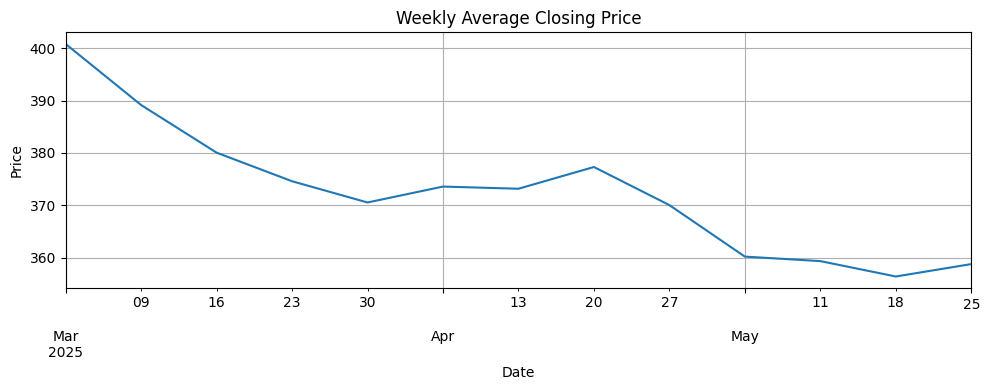

In [6]:
# Plot weekly
plt.figure(figsize=(10, 4))
weekly.plot(title='Weekly Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

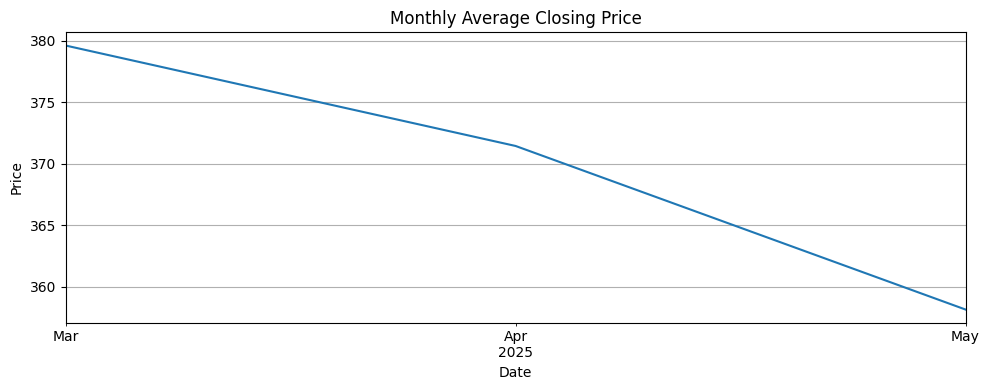

In [7]:
# Plot monthly
plt.figure(figsize=(10, 4))
monthly.plot(title='Monthly Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=dc22e87f22912b6bc56db55b8df12ec18c486d21ef36728521fde54e4bd84b9a
  Stored in directory: /root/.cache/pip/wheels/a1/d7/29/7781cc5eb9a3659d032d7d15bdd0f49d07d2b24fec29f44bc4
Successfully built ta


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import ta

# Load the cleaned data
df = pd.read_csv('/content/nepal_commercial_banks_cleaned.csv', parse_dates=['tradedate'], index_col='tradedate')

# Optional: restrict to a single stock if needed
# df = df[df['stocksymbol'] == 'NABIL']


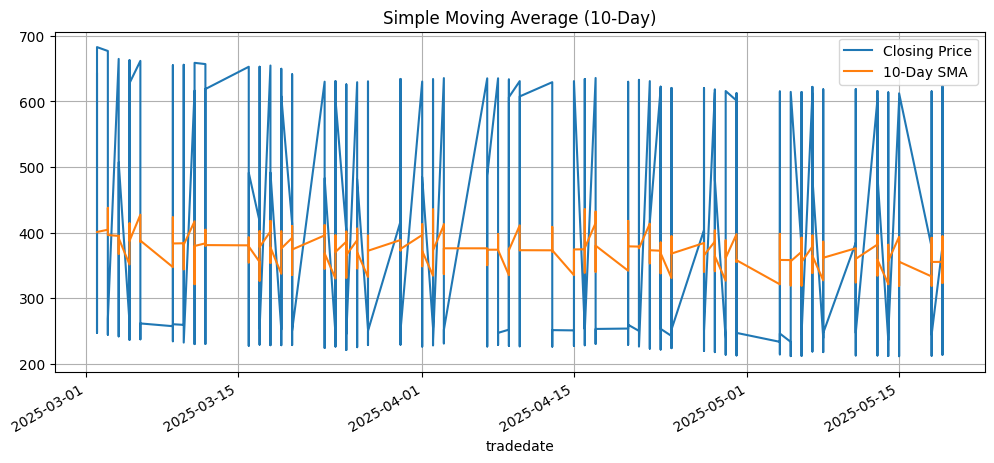

In [10]:
df['SMA_10'] = df['closingprice'].rolling(window=10).mean()

plt.figure(figsize=(12, 5))
df['closingprice'].plot(label='Closing Price')
df['SMA_10'].plot(label='10-Day SMA')
plt.title('Simple Moving Average (10-Day)')
plt.legend()
plt.grid(True)
plt.show()


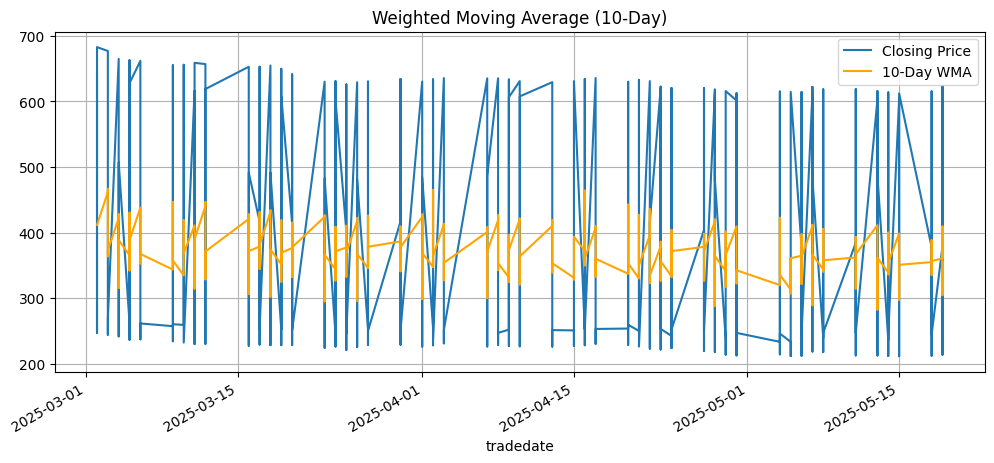

In [11]:
weights = list(range(1, 11))  # For 10-day WMA

def weighted_moving_average(series, weights):
    return series.rolling(window=len(weights)).apply(lambda prices: sum(weights * prices) / sum(weights), raw=True)

df['WMA_10'] = weighted_moving_average(df['closingprice'], weights)

plt.figure(figsize=(12, 5))
df['closingprice'].plot(label='Closing Price')
df['WMA_10'].plot(label='10-Day WMA', color='orange')
plt.title('Weighted Moving Average (10-Day)')
plt.legend()
plt.grid(True)
plt.show()


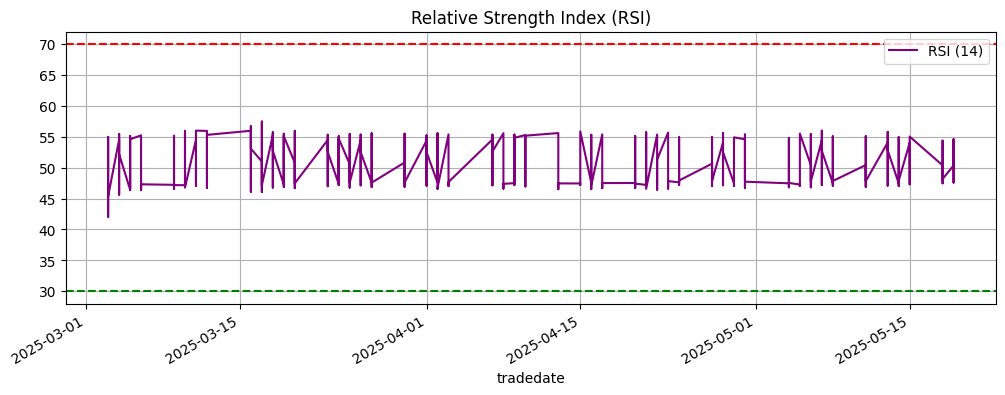

In [12]:
df['RSI_14'] = ta.momentum.RSIIndicator(close=df['closingprice'], window=14).rsi()

plt.figure(figsize=(12, 4))
df['RSI_14'].plot(label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.grid(True)
plt.legend()
plt.show()


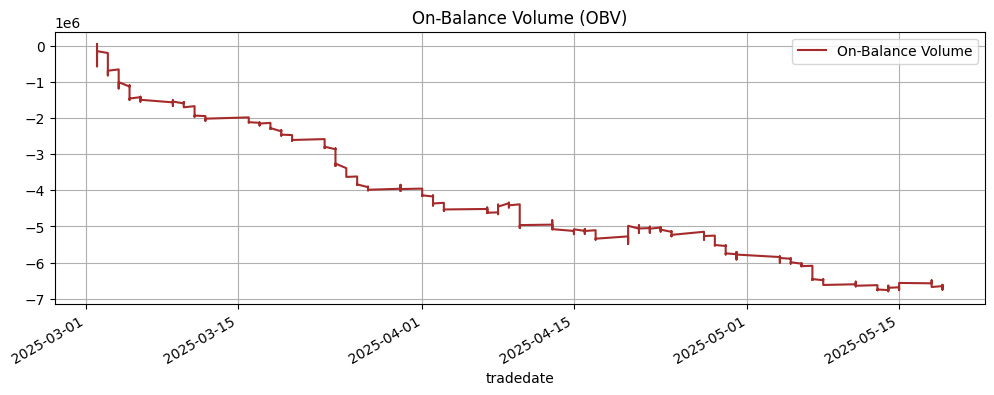

In [13]:
df['OBV'] = ta.volume.OnBalanceVolumeIndicator(close=df['closingprice'], volume=df['volume']).on_balance_volume()

plt.figure(figsize=(12, 4))
df['OBV'].plot(label='On-Balance Volume', color='brown')
plt.title('On-Balance Volume (OBV)')
plt.grid(True)
plt.legend()
plt.show()


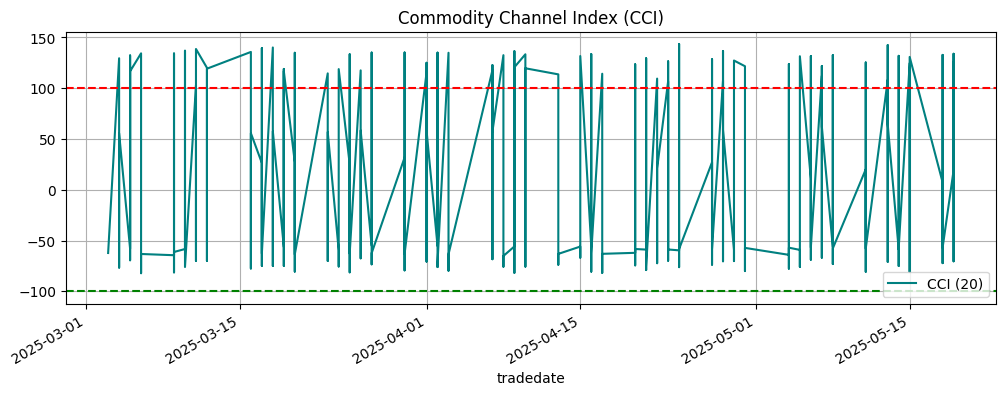

In [14]:
df['CCI'] = ta.trend.CCIIndicator(high=df['maxprice'], low=df['minprice'], close=df['closingprice'], window=20).cci()

plt.figure(figsize=(12, 4))
df['CCI'].plot(label='CCI (20)', color='teal')
plt.axhline(100, color='red', linestyle='--')
plt.axhline(-100, color='green', linestyle='--')
plt.title('Commodity Channel Index (CCI)')
plt.grid(True)
plt.legend()
plt.show()
